# Building a Neural Network from Scratch!
(Built on the fundamental math behind Machine Learning. NOT just 10 lines of Tensorflow, as much fun as that is.)<br>
Credits: MIT PhD candidate Dr. Raj Dandekar's notes<br><br>
Code written by me, images taken directly from his notes.<br>
<hr>

<h2>Part 1</h2>

<h3> First neuron </h3>
<img src="images/1.1.png">

In [71]:
inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = (inputs[0]*weights[0]) + (inputs[1]*weights[1]) + (inputs[2]*weights[2]) + bias

print("Output: " + str(output))
# The ultimate goal is to come up with the RIGHT weights for each calculation (neuron)
# And then, structure them in the right way (network of neurons).

Output: 2.3


<h3>First <u>Layer</u> of Neurons</h3>
<img src="images/1.2.png">

In [72]:
# Set up
inputs = [1, 2, 3]
weights = [[0.2, 0.8, -0.5],
           [0.5, -0.91, 0.26],
           [-0.26, -0.27, 0.17],
           ]
biases = [2, 3, 0.5]

In [73]:
# Hard coded, WITHOUT loops, just to understand the concept
weights1 = weights[0]
weights2 = weights[1]
weights3 = weights[2]

outputs = [
    (inputs[0]*weights1[0] + inputs[1]*weights1[1] + inputs[2]*weights1[2] + biases[0]), # neuron 1
    (inputs[0]*weights2[0] + inputs[1]*weights2[1] + inputs[2]*weights2[2] + biases[1]), # neuron 2
    (inputs[0]*weights3[0] + inputs[1]*weights3[1] + inputs[2]*weights3[2] + biases[2]), # neuron 3
]

print("Outputs: " + str(outputs))

Outputs: [2.3, 2.46, 0.20999999999999996]


In [74]:
# WITH a loop, for actual use (any number of neurons, layers, inputs, etc.)

outputs = []
for neuron_weights, neuron_bias in zip(weights, biases): 
    # zip() allows parallel looping, to access items in different lists, ideally of the same size
    output = neuron_bias
    
    for input, weight in zip(inputs, neuron_weights):
        output += input*weight
    
    outputs.append(output)

print("Outputs: " + str(outputs))

Outputs: [2.3000000000000003, 2.46, 0.20999999999999996]


<hr>
<h2> Part 2 </h2>


<h3>Single neuron <u>with np.dot</u></h3>

In [75]:
import numpy as np

inputs = [1, 2, 3]
weights = [0.2, 0.8, -0.5]
bias = 2

output = np.dot(inputs, weights) + bias
print("Output: " + str(output))

AttributeError: 'list' object has no attribute 'astype'

<h3>Entire layer <u>with np.dot</u></h3>

Using Matrix-Vector multiplication!

<img src="images/2.1.png" width="600px">

In [6]:
# Set up (same as part 1)
inputs = [1, 2, 3]
weights = [[0.2, 0.8, -0.5],
           [0.5, -0.91, 0.26],
           [-0.26, -0.27, 0.17],
            ]
biases = [2, 3, 0.5]

outputs = np.dot(weights, inputs) + biases # Each row of weights is multiplied by inputs column, exactly how weights are used 
print("Outputs: " + str(outputs))

# ENTIRE code in part 1 with a loop, is replaced by just ONE line!! SO COOL.

Outputs: [2.3  2.46 0.21]


<h3>Complete batch of data <u>with np.dot</u></h3>

With matrix-matrix multiplication

<img src="images/2.2.png" width="500px" height="255.5px" style="margin-right:10px"><img src="images/2.3.png" width="500px">
<br><br>
<h3><i>But what is a batch?</i></h3>
One batch is the equivalent of one data point, with multiple characteristics.<br>
For example, if predicting house prices, one "batch" = 1 house.<br>
In this case, each house then has 4 characteristics for it (ex: no. of bedrooms, bathrooms, land area, neighourhood avg price)

In [7]:
# each row represents the inputs for one specific neuron
inputs = [[1, 2, 3, 2.5], 
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]


# Each row represents the weights for one specific neuron... 
# Later transposed to make sense in sync with how matrix multiplication works - 
# - each row of matrix A multiplied with each COLUMN of matrix B
weights = [[0.2, 0.8, -0.5, 1], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights = np.array(weights) # np.dot doesnt take lists, so must convert to array

outputs = np.dot(inputs, weights.T) + biases # The bias just adds the number to every item in that column.

print("Outputs: \n" + str(outputs))


Outputs: 
[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


<hr>
<h2>Part 3</h2>
Creating and connecting layers to each other.<br>
The input layer sends 3 data points (batches), with 4 features each.
The output layer gives a single number output for each input data point (batch).

For example,<br>
If we were <b>predicting house prices</b>, in this case, we'd be passing 3 different houses as input...<br>
<b><i>Each house's input =></i></b> Its 4 features - #bedrooms, #bathrooms, square footage, avg house price in locality (as examples)<br>
<b><i>Each house's output =></i></b> Predicted price for the house.

Future Goal: Right now, the weights and biases are all manually+randomly set. Our neural network would actually be functional when they are set based on training data. The trained model would be something like what's given below, with final weights and biases. Then, we'd be able to send new houses as input, and we'd actually get their predicted prices.

<h3> Input Layer + 2 hidden layers of neurons </h3>
<img src="images/3.1.png" width="300px">

In [8]:
import matplotlib.pyplot as plt
## Input Layer
inputs = [[1, 2, 3, 2.5], #3x4 matrix
          [2, 5, -1, 2],
          [-1.5, 2.7, 3.3, -0.8]]

## HIDDEN LAYER 1 => 3 neurons, with 4 weights (equal to number of inputs) and 1 bias each. 
weights1 = [[0.2, 0.8, -0.5, 1],  #3x4 matrix
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases1 = [2, 3, 0.5]

## HIDDEN LAYER 2 => 3 neurons, with 3 weights (now its 3 because inputs are only 3, taken from previous hidden layer) and 1 bias each.
weights2 = [[0.1, -0.14, 0.5], #3x3 matrix
           [-0.5, 0.12, -0.33],
           [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]
##########################################################

weights1 = np.array(weights1)
weights2 = np.array(weights2)

layer1output = np.dot(inputs, weights1.T) + biases1 # dot product of 3x4 and 4x3 matrices = 3x3 matrix

# layer1output is then passed as INPUT to the 2nd hidden layer, which then gives its output.
layer2output = np.dot(layer1output, weights2.T) + biases2 # dot product of 3x3 and 3x3 matrices = 3x3 matrix

print("Outputs:\n" + str(layer2output)) # Each row is the output for one batch of data...

Outputs:
[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


<h3>Adding final (output) layer</h3>

In [9]:
# Creating final layer with just 1 neuron, so we get a single number as output for each batch of data

weights3 = [[0.2, 0.3, 0.4]]
bias = [0.5]

weights3 = np.array(weights3)

layer3output = np.dot(layer2output, weights3.T) + bias

<h3>Input layer (4 input neurons) -> Hidden layer 1 (3 neurons) -> Hidden layer 2 (3 neurons) -> Output layer (1 output neuron)</h3>

In [10]:
print("Single value output for each input batch:\n" + str(layer3output))

Single value output for each input batch:
[[-0.527435]
 [-2.5766  ]
 [ 0.582514]]


<hr>
<h2>Part 4</h2>

<h3>Generating random data</h3>
Till now, all input data was created by manually typing out 2d Lists / matrices. Also, we had linear data. <br>
Neural networks are trained so they can tackle non-linear data (linear can be solved with just regression anyways).<br>

Now we'll start (non-linear) input data for our experimentation using the nnfs (Neural Networks from Scratch) package.

[]

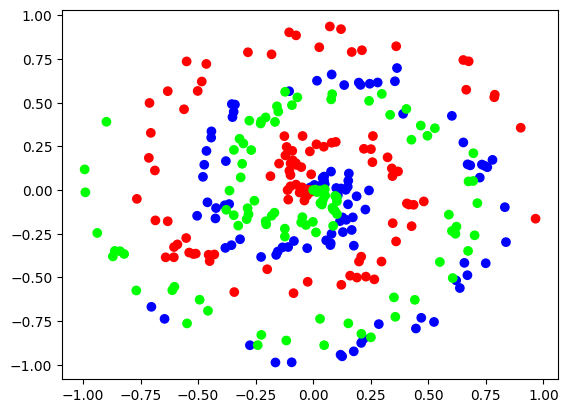

In [14]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
import matplotlib.pyplot as plt

# Getting data from nnfs.. 10 data points with 2 just features (x and y) each (so its easy to display in 2d... previous manual input data couldnt be represented like this since it had 4 features).
X, cf = spiral_data(samples=100, classes=3) # X is a 100x2 matrix with the x and y features. cf is a 1d array with the classification (0, 1, or 2) of each data point.


# Creating a scatterplot with matplotlib
# Values passed - 
# 1) All x coordinate values, All row values in 0th column => X[:,0]
# 2) all y coordinate values, All row values in index 1 column => X[:,1]
# 3) classifications to be used for coloring the data points => c=cf
# 4) cmap is to edit colors... specific options available (another is is "brg" for RGB values) => cmap="gist_rainbow"

plt.scatter(X[:,0], X[:,1], c=cf, cmap="brg")
plt.plot()



<h3>"Dense Layer" Class</h3>
Creating a set class to be able to create layers based on - # neurons and # inputs(for that layer)<br>
<br>
<i>
<b>Note:Switching from matrix dimensions Neurons*Inputs to Inputs*Neurons</b><br>
Till now, each row represented the weights of a single neuron. Now each column will be the weights of one neuron, and the number of columns = number of inputs. (Earlier we would convert to this using transpose)<br>
So, if layer(3 neurons, 4 inputs/features), then 4x3 matrix (earlier it was 3x4).
</i>


In [70]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, num_inputs, num_neurons): #Creates the weights and biases matrix that make up the layer
        self.weights = np.random.randn(num_inputs, num_neurons) #Creates matrix with random weights for now - from 0 to 1 (using Gaussian distribution)
        self.weights *= 0.01 #Keeping weights quite small for now
        self.biases = np.zeros((1, num_neurons)) #Column of zero biases for now
    
    def forward(self, inputs): #Return the actual output, after passing input through the created layer
        self.output = np.dot(inputs, self.weights) + self.biases # Similar to previous manual implementation (except dimension change as mentioned in title "note")


### Using the Dense Layer class created!

X, y = spiral_data(samples = 100, classes = 1)


dense1 = Layer_Dense(2, 3) # 2 features in spiral data, NOT 100 because number of data points / batches doesnt matter, number of features does... 3 neuron layer, output will have 3 features.
dense1.forward(X)

print(X.shape)
print(dense1.output.shape)

print("\n")
print(dense1.output[:5])


(100, 2)
(100, 3)


[[ 0.          0.          0.        ]
 [ 0.00014992 -0.00015354  0.00014944]
 [ 0.00039343 -0.00035618  0.00013883]
 [ 0.00060759 -0.00045617 -0.00029437]
 [ 0.00083074 -0.00063927 -0.00031815]]


<hr>
<h2>Part 5</h2>
Notes for future usage of functions

<h3>np.sum() Array Summation</h3>

Take a matrix A
<ul>
<li>np.sum(A) => Outputs single value with sum of all values in A (axis=none by default)
<li>np.sum(A, axis=0) => Outputs a 1d array that sums the rows (all the vertical numbers are summed), resulting in a single row... Axis=1 leads to summing the columns, resulting in a single column (but it'll still be converted to 1d array, so like a row, unless keepdims=true)
<li>np.sum(A, axis=0, keepdims=true) => "Keep dimensions" => The output remains a 2d array, even though it's just a single row/column...




<h3>Broadcasting</h3>

If both matrices are same size, they can be added anyways!<br>
But if some dimension is 1 or just doesnt exist, i.e its a row/column vector, the row/column just gets duplicated to increase the match the dimensions of the other matrix automatically when you sum them.<br>

<img src="images/5.1.png" width="300px" style="margin-right:10px"><img src="images/5.2.png" width="823px">

<i style="margin-left:315px">(Above image shows importance of keepdims atrribute in np.sum/np.max/etc.^^^^)</i>
